# <p style="text-align: center;"> Final Project - Introduction to Data Science</p>
# <p style="text-align: center;"> <b> Data Pre-processing </b></p>
---

## Member Information
| Name              | ID       |
|-------------------|----------|
|Tran Đinh Quang    | 21127406 |
|Nguyen Hong Hanh   | 21127503 |
|Đo Quoc Tri  | 21127556 |
| Nguyen Khanh Nhan | 21127657         |


## Table of contents



---

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats

In [33]:
FILE_PATH = '../data/raw.csv'
df = pd.read_csv(FILE_PATH)

df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunriseEpoch,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,severerisk
0,2009-09-27,1253984400,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,...,1254004923,17:46:17,1254048377,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
1,2009-09-28,1254070800,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,...,1254091320,17:45:39,1254134739,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,NaN
2,2009-09-29,1254157200,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,...,1254177718,17:45:01,1254221101,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
3,2009-09-30,1254243600,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,...,1254264116,17:44:24,1254307464,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN
4,2009-10-01,1254330000,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,...,1254350514,17:43:46,1254393826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,NaN


# Add - Remove columns

**Numeric data:**

*   'datetime', 'dateEpoch': the purpose of the problem is to rely on environmental data to predict the weather at that specific time. Therefore, when it comes to time, we will use a column for  month for analysis instead of storing a specific date
*   'precip', 'precipprob', 'precipcover': remove because, for the data of precipitation, we have a column 'preciptype' with only 2 values: 'rain' or null, and others are equal 0 when 'preciptype' is null. It's possible to consider merging these columns into one 'preciptype' column with boolean data type (0: null, 1: rain)
*   'sunrise', 'sunset', 'sunriseEpoch', 'sunsetEpoch': for the sunrise and sunset times, we will store as the number of seconds since 00:00 so that it will be convenient when analyze the relationships between these two columns and the remaining columns in the dataframe
*   'snow', 'snowdepth': as the data is obtained from Ho Chi Minh City, Vietnam, a city where snowfall never occurs, we will remove columns related to snow with a high number of missing values
*   'windgust', 'severerisk': remove due to a high percentage of missing values (90%) and lack of meaningful relevance to the posed problem

In [34]:
df['month'] = pd.to_datetime(df['datetime']).dt.month

# df['preciptype'][115] là chỗ ['rain'], để == ['rain'] thì nó không nhận ra?
df['preciptype'] = [1 if i == df['preciptype'][115] else 0 for i in df['preciptype']]

df['sunrise'] = pd.to_datetime(df['sunrise'])

df['sunrise'] = df['sunrise'].dt.hour * 3600 + df['sunrise'].dt.minute * 60 + df['sunrise'].dt.second

df['sunset'] = pd.to_datetime(df['sunset'])

df['sunset'] = df['sunset'].dt.hour * 3600 + df['sunset'].dt.minute * 60 + df['sunset'].dt.second

drop_columns = ['datetime', 'datetimeEpoch','precip', 'precipprob', 'precipcover', 'windgust', 'sunriseEpoch', 'sunsetEpoch', 'snow', 'snowdepth', 'severerisk']

df = df.drop(columns=drop_columns, axis=1)

df.head()

C:\Users\nguyn\AppData\Local\Temp\ipykernel_21428\571173058.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'])
C:\Users\nguyn\AppData\Local\Temp\ipykernel_21428\571173058.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'])


,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,source,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,NaN,20523,63977,0.27,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,NaN,20520,63939,0.30,Overcast,Cloudy skies throughout the day.,cloudy,['48900099999'],obs,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,NaN,20518,63901,0.34,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,NaN,20516,63864,0.37,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,NaN,20514,63826,0.40,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,['48900099999'],obs,10


**Categorical data**

*   'description', 'conditons': remove because we only need one column with good classification properties to serve as the label ('icon')
*   'stations': remove as its values are complex and not helpful for this project
*   'source': remove as it has only one unique value

In [35]:
drop_columns = ['description', 'conditions', 'stations', 'source']

df = df.drop(columns=drop_columns, axis=1)

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,icon,month
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,87.9,5.6,NaN,NaN,NaN,20523,63977,0.27,partly-cloudy-day,9
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,90.4,6.6,NaN,NaN,NaN,20520,63939,0.30,cloudy,9
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,82.1,6.6,NaN,NaN,NaN,20518,63901,0.34,partly-cloudy-day,9
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,90.0,5.7,NaN,NaN,NaN,20516,63864,0.37,partly-cloudy-day,9
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,70.8,6.6,NaN,NaN,NaN,20514,63826,0.40,partly-cloudy-day,10


# Encode categorical columns

In [36]:
df.dtypes

tempmax           float64
tempmin           float64
temp              float64
feelslikemax      float64
feelslikemin      float64
feelslike         float64
dew               float64
humidity          float64
preciptype          int64
windspeed         float64
winddir           float64
pressure          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
uvindex           float64
sunrise             int32
sunset              int32
moonphase         float64
icon               object
month               int32
dtype: object

In [37]:
#One-hot encoding
df = pd.get_dummies(df, prefix='icon')

df.head()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain
0,87.9,73.5,78.9,100.9,73.5,82.5,76.5,93.0,0,18.3,...,NaN,NaN,20523,63977,0.27,9,False,False,True,False
1,84.8,75.3,79.6,94.0,75.3,82.7,75.7,88.4,0,13.9,...,NaN,NaN,20520,63939,0.30,9,False,True,False,False
2,84.5,77.1,80.5,93.5,77.1,84.6,76.2,87.0,0,16.1,...,NaN,NaN,20518,63901,0.34,9,False,False,True,False
3,87.9,74.6,79.3,100.2,74.6,82.4,76.3,91.7,0,17.2,...,NaN,NaN,20516,63864,0.37,9,False,False,True,False
4,89.7,75.3,80.9,100.5,75.3,85.4,76.3,87.2,0,12.8,...,NaN,NaN,20514,63826,0.40,10,False,False,True,False


# Detect outlier

In [38]:
df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,pressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,sunrise,sunset,moonphase,month
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,...,4999.000000,5000.000000,5000.000000,4904.000000,4904.000000,4904.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,91.041220,76.14564,82.354120,99.919340,76.942880,87.187940,73.726820,77.205960,0.62780,12.067560,...,1008.960392,56.483300,6.055920,205.420310,17.744168,7.201876,20974.707800,64603.808400,0.483794,6.501000
std,3.281317,3.21651,2.659416,5.709696,4.945019,5.232159,3.837916,9.359366,0.48344,3.317442,...,2.042986,14.138278,1.174452,59.917768,5.181503,2.019694,884.759487,1006.387513,0.288521,3.480693
min,73.600000,44.50000,71.700000,73.600000,41.200000,71.700000,54.100000,49.500000,0.00000,4.500000,...,1000.500000,12.900000,3.200000,15.000000,1.300000,1.000000,19777.000000,62796.000000,0.000000,1.000000
25%,89.600000,74.37500,80.700000,96.400000,74.375000,83.575000,71.800000,70.800000,0.00000,9.800000,...,1007.600000,46.700000,5.800000,155.975000,13.500000,6.000000,20388.000000,63715.750000,0.250000,3.000000
50%,91.400000,76.90000,82.400000,100.300000,76.900000,86.800000,74.800000,77.900000,1.00000,11.400000,...,1008.800000,55.400000,6.100000,204.700000,17.700000,7.000000,20608.000000,64989.500000,0.480000,6.000000
75%,93.200000,78.70000,84.100000,103.900000,78.700000,90.400000,76.500000,84.300000,1.00000,13.900000,...,1010.300000,65.900000,6.400000,255.400000,22.000000,9.000000,21733.000000,65337.000000,0.750000,10.000000
max,100.500000,85.90000,90.500000,119.700000,100.300000,106.900000,81.400000,99.800000,1.00000,31.100000,...,1015.800000,100.000000,47.600000,324.200000,28.000000,10.000000,22618.000000,66006.000000,0.980000,12.000000


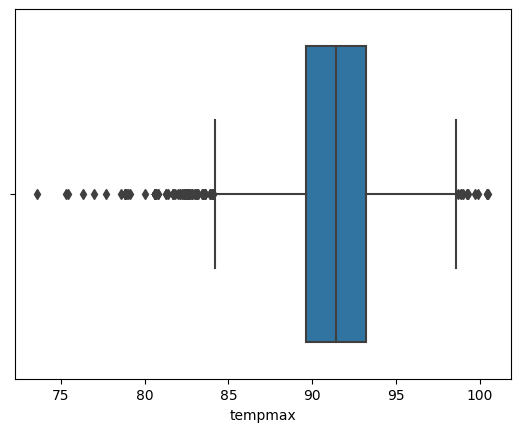

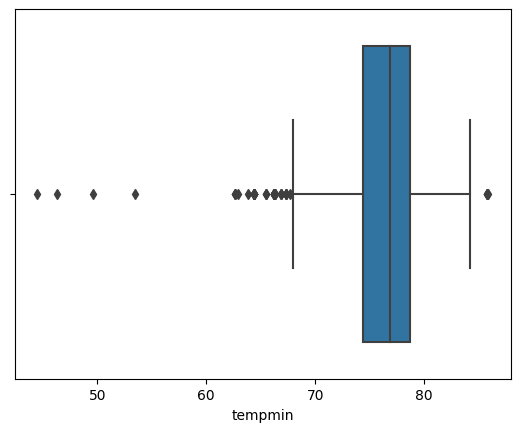

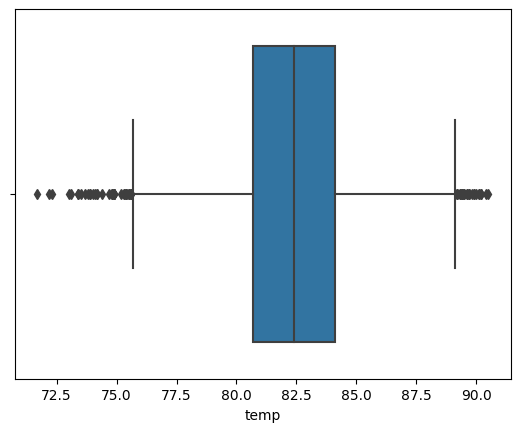

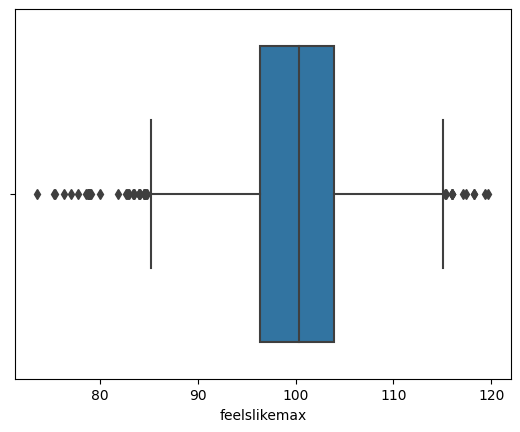

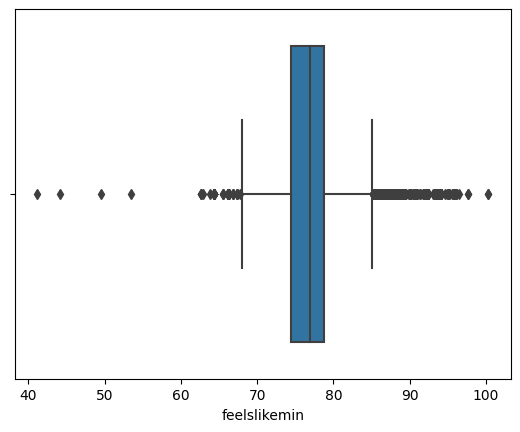

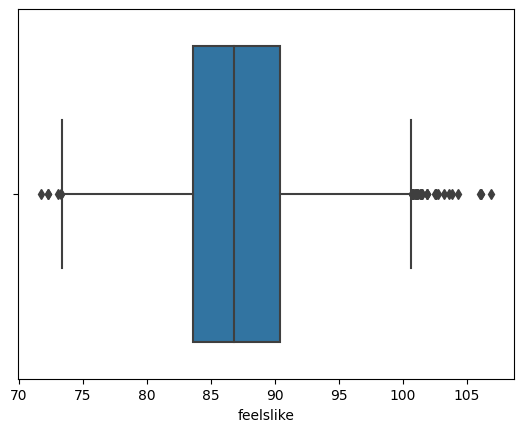

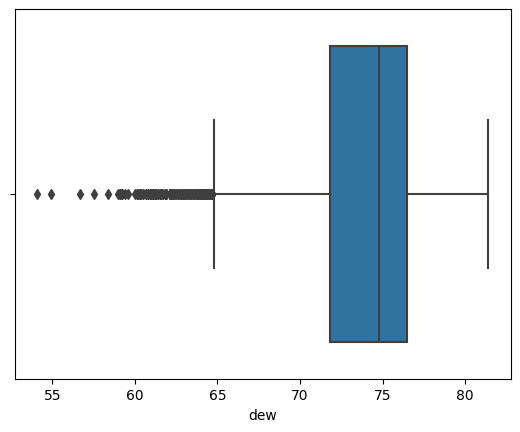

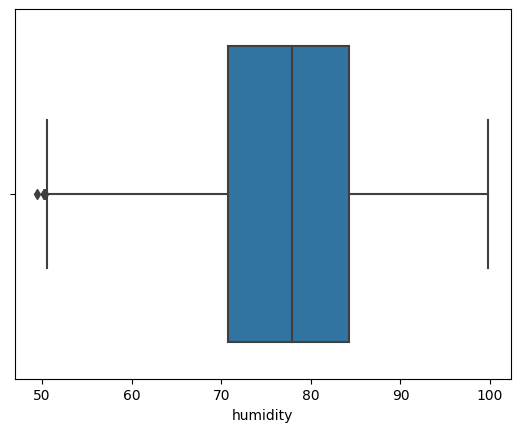

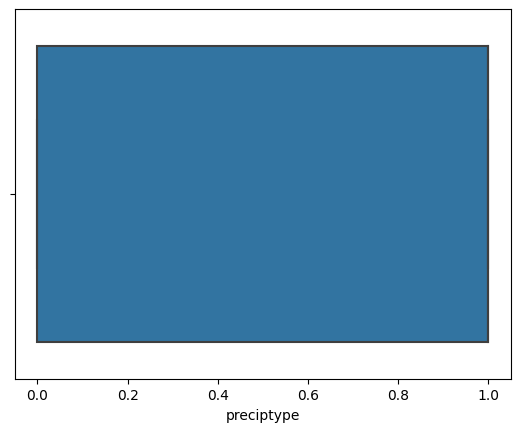

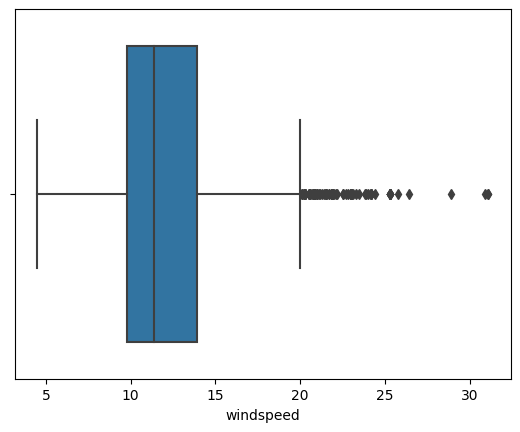

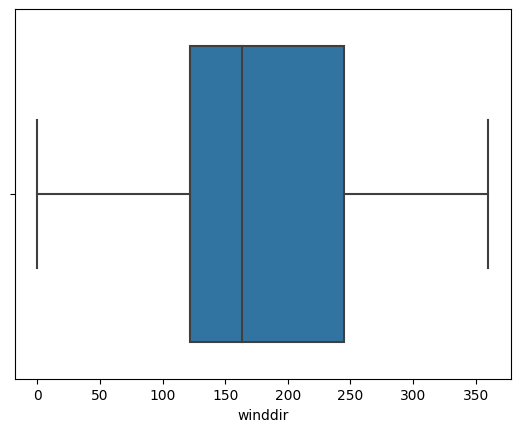

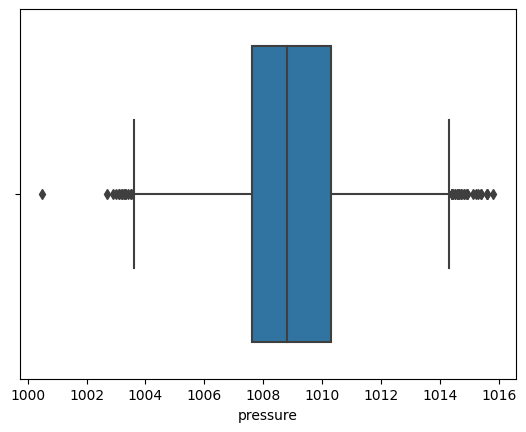

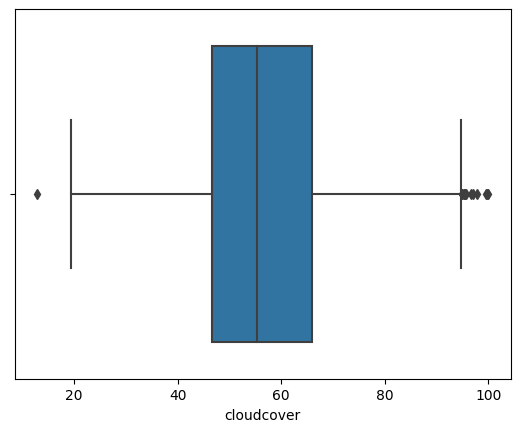

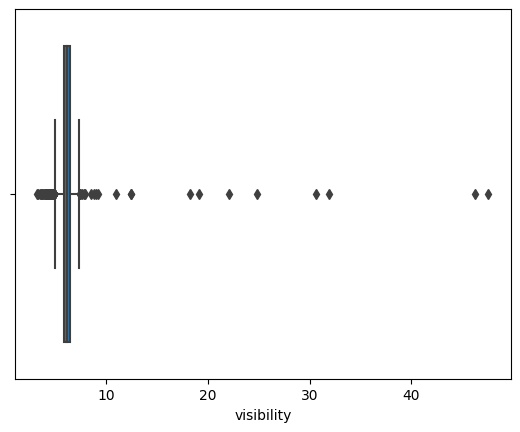

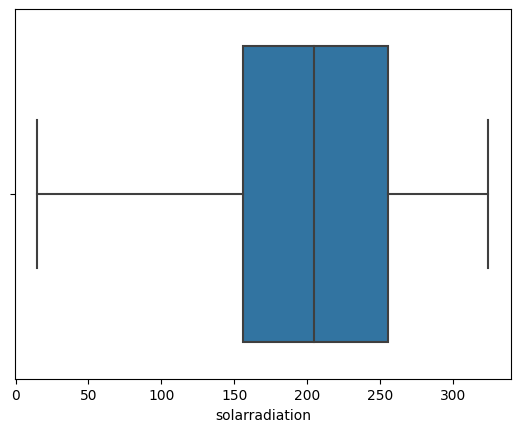

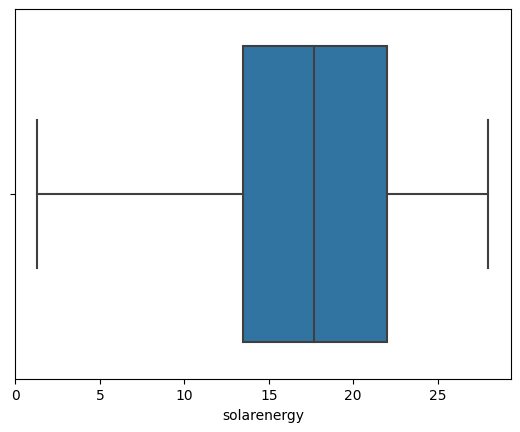

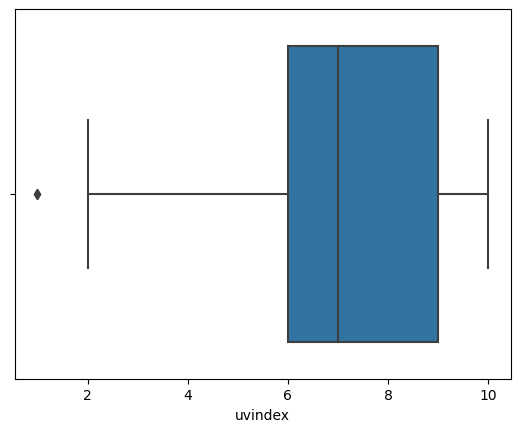

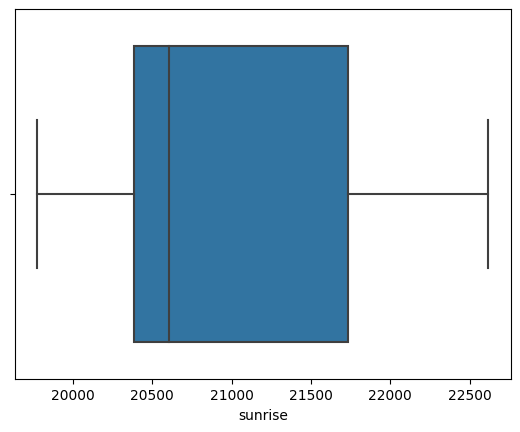

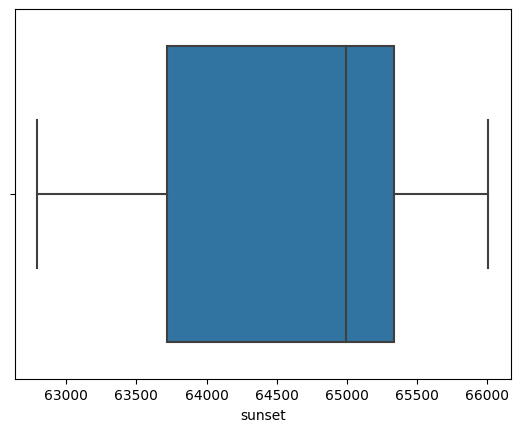

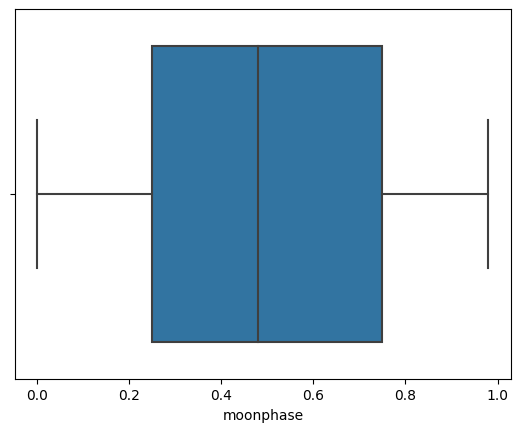

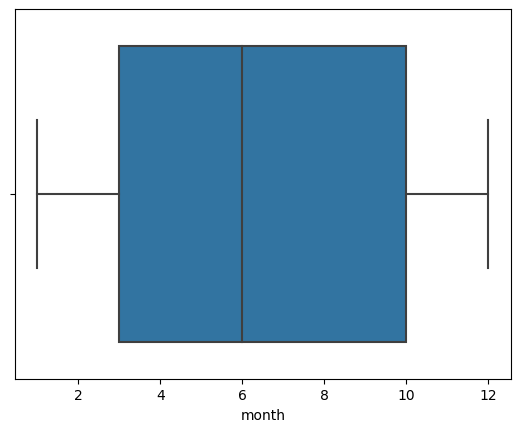

In [39]:
for col in df.drop(columns=['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']).columns:
    sns.boxplot(x = df[col])
    plt.show()

Remove extreme outliers in 'visibility' column

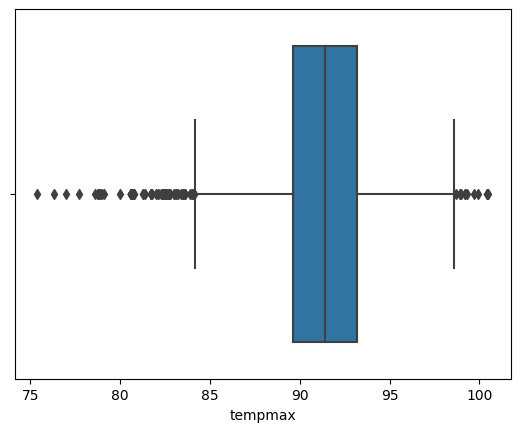

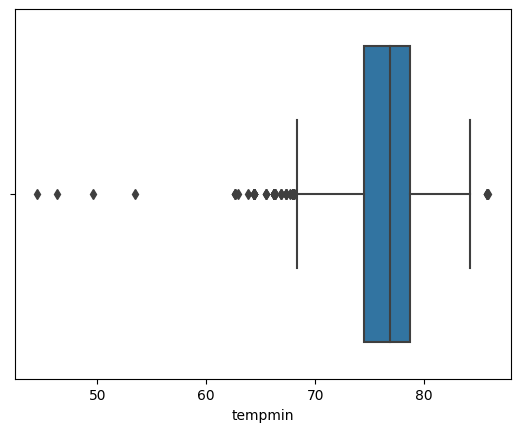

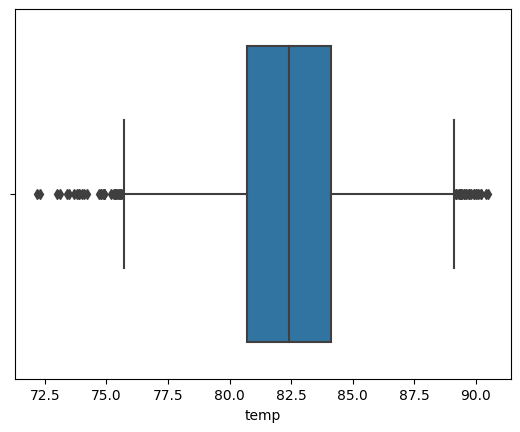

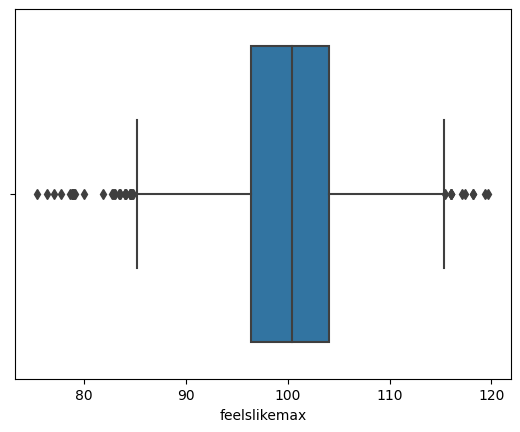

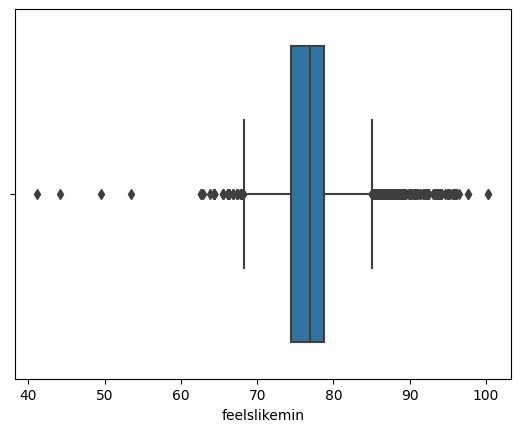

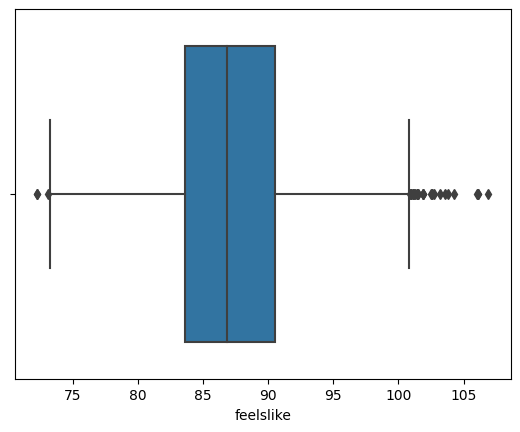

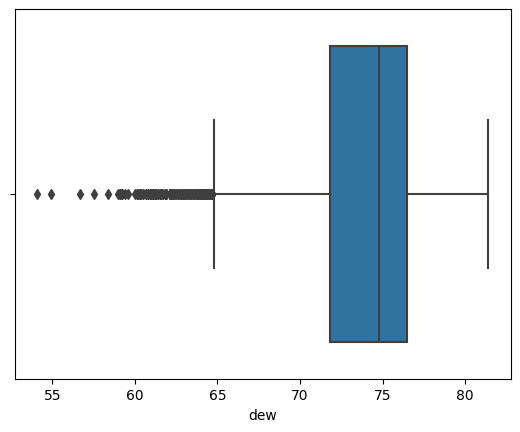

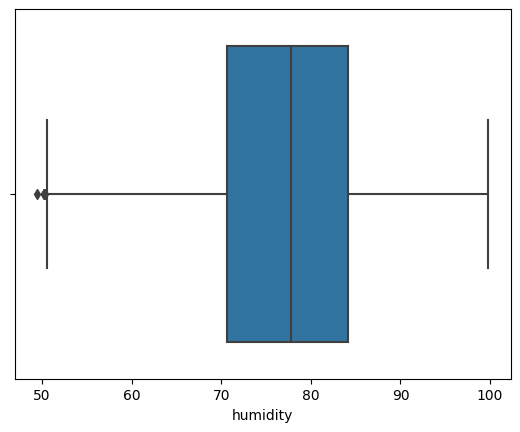

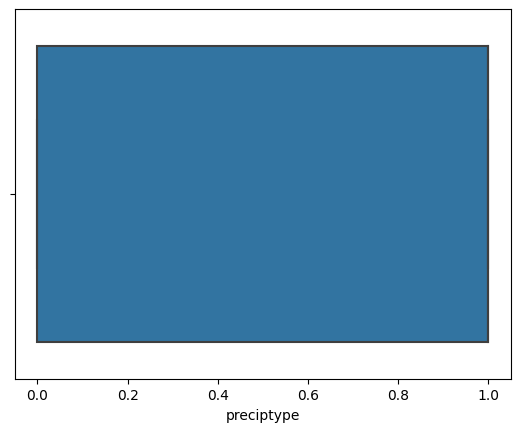

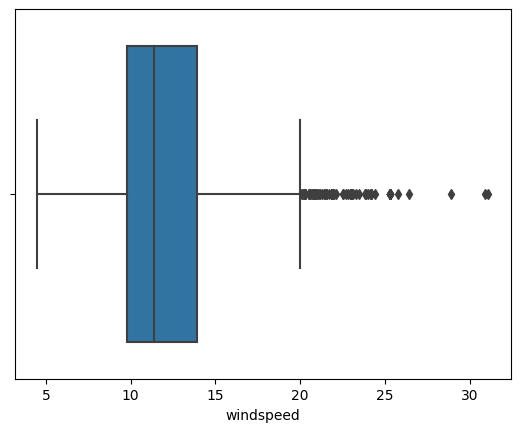

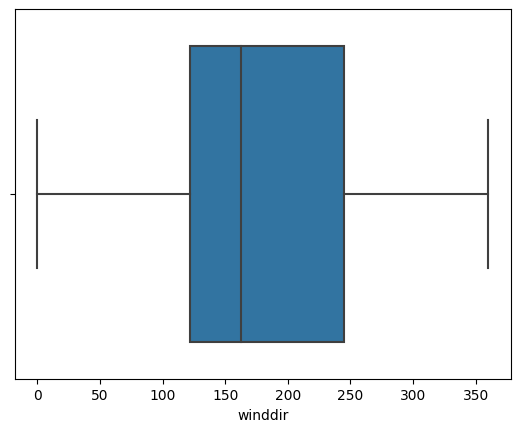

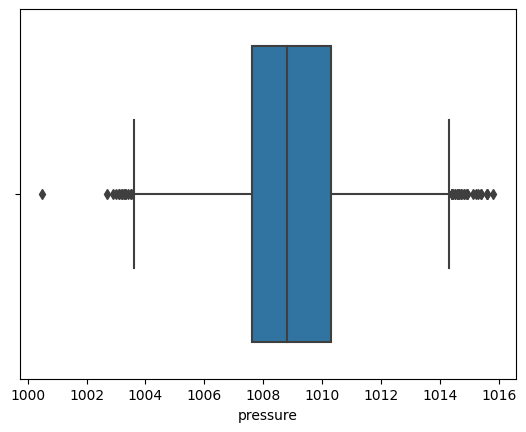

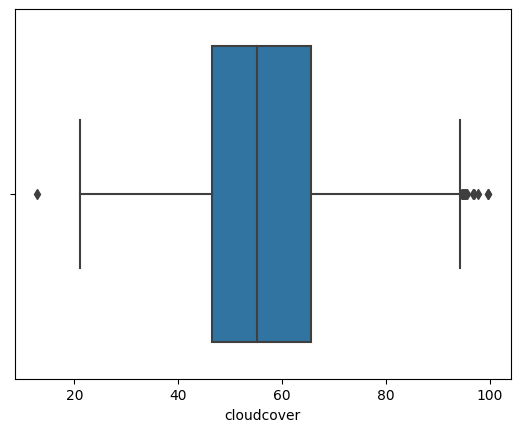

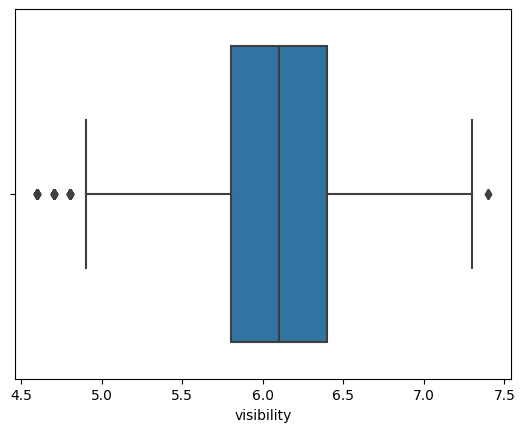

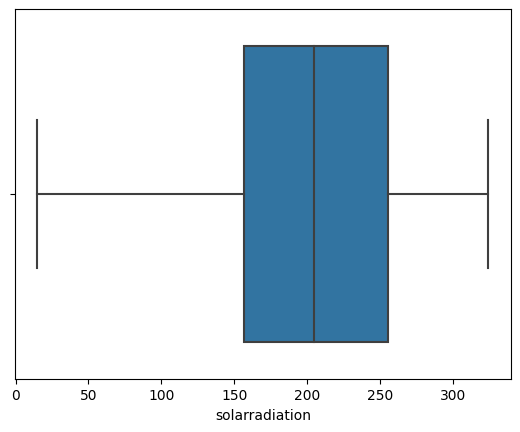

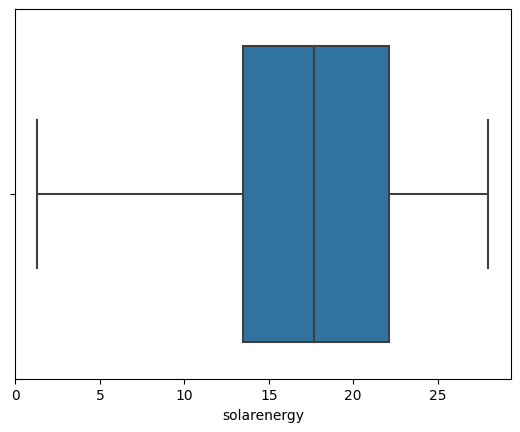

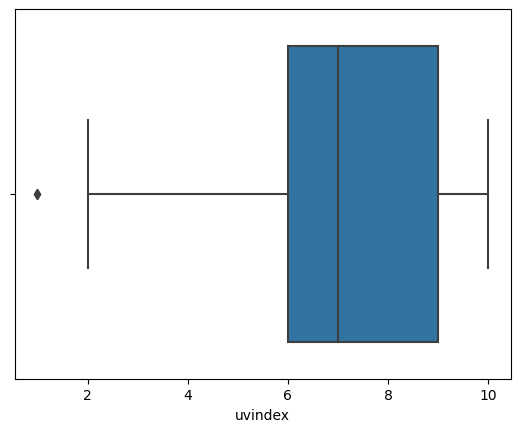

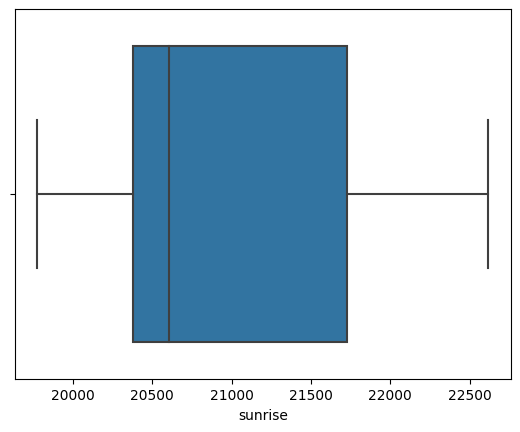

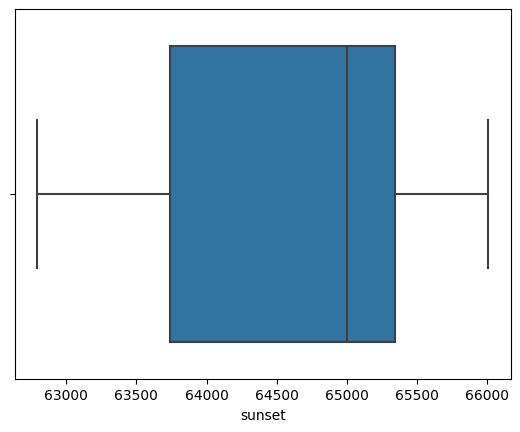

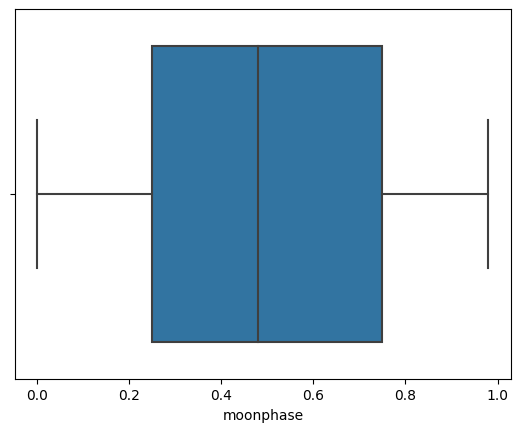

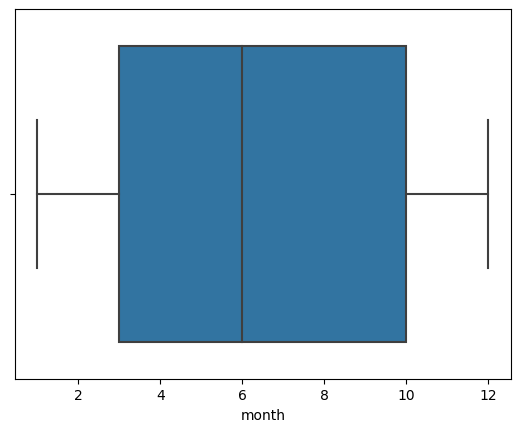

In [41]:
threshold = 3

z_scores = stats.zscore(df['visibility'])

df = df[(z_scores < threshold) & (z_scores > -threshold)]

for col in df.drop(columns=['icon_clear-day', 'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain']).columns:
    sns.boxplot(x = df.drop_duplicates()[col])
    plt.show()

# Missing values

In [42]:
missing_values_per_column = df.isnull().sum()

print(missing_values_per_column)

tempmax                    0
tempmin                    0
temp                       0
feelslikemax               0
feelslikemin               0
feelslike                  0
dew                        0
humidity                   0
preciptype                 0
windspeed                  0
winddir                    0
pressure                   1
cloudcover                 0
visibility                 0
solarradiation            92
solarenergy               92
uvindex                   92
sunrise                    0
sunset                     0
moonphase                  0
month                      0
icon_clear-day             0
icon_cloudy                0
icon_partly-cloudy-day     0
icon_rain                  0
dtype: int64


In [44]:
k_neighbors = 7

knn_imputer = KNNImputer(n_neighbors=k_neighbors)

df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

In [45]:
df_imputed.to_csv('../data/processed_data.csv', index=False)

In [46]:
df_imputed.corr()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,preciptype,windspeed,...,solarenergy,uvindex,sunrise,sunset,moonphase,month,icon_clear-day,icon_cloudy,icon_partly-cloudy-day,icon_rain
tempmax,1.000000,0.496675,0.835051,0.594312,0.508924,0.688527,0.035026,-0.503710,-0.200616,0.085187,...,0.401677,0.343089,-0.142295,0.293343,0.014496,-0.326210,-0.003551,-0.027803,0.201886,-0.200918
tempmin,0.496675,1.000000,0.795358,0.658310,0.922695,0.821926,0.543913,-0.006668,0.193565,0.162384,...,0.013258,-0.015226,-0.483883,0.317779,0.011194,-0.053048,-0.028398,-0.003930,-0.192565,0.193475
temp,0.835051,0.795358,1.000000,0.679297,0.775473,0.921164,0.295632,-0.375751,-0.031252,0.078089,...,0.263555,0.214384,-0.339923,0.313529,0.009398,-0.193285,-0.021154,-0.015195,0.032627,-0.031550
feelslikemax,0.594312,0.658310,0.679297,1.000000,0.609338,0.828958,0.739292,0.269436,0.340959,0.259220,...,-0.120826,-0.149629,-0.675622,0.416368,0.002062,0.050173,-0.029627,-0.015049,-0.340867,0.342109
feelslikemin,0.508924,0.922695,0.775473,0.609338,1.000000,0.825774,0.457210,-0.076475,0.119123,0.122712,...,0.068757,0.043908,-0.436469,0.307251,0.011015,-0.105804,-0.020708,-0.004875,-0.117701,0.118429
feelslike,0.688527,0.821926,0.921164,0.828958,0.825774,1.000000,0.565407,-0.068984,0.175350,0.120864,...,0.057503,0.023230,-0.544793,0.362425,0.003924,-0.063686,-0.025102,-0.012510,-0.174350,0.175420
dew,0.035026,0.543913,0.295632,0.739292,0.457210,0.565407,1.000000,0.770354,0.591650,0.203683,...,-0.450257,-0.449176,-0.750723,0.231070,-0.003090,0.345422,-0.049709,0.007331,-0.591376,0.592495
humidity,-0.503710,-0.006668,-0.375751,0.269436,-0.076475,-0.068984,0.770354,1.000000,0.591031,0.153650,...,-0.604486,-0.573692,-0.505618,0.023068,-0.008645,0.456394,-0.031444,0.017324,-0.591716,0.592003
preciptype,-0.200616,0.193565,-0.031252,0.340959,0.119123,0.175350,0.591650,0.591031,1.000000,0.173932,...,-0.556179,-0.523244,-0.569284,0.121952,-0.013905,0.373976,-0.018447,-0.018447,-0.996963,0.997833
windspeed,0.085187,0.162384,0.078089,0.259220,0.122712,0.120864,0.203683,0.153650,0.173932,1.000000,...,-0.113992,-0.139701,-0.275565,0.454763,-0.016670,-0.112180,-0.001672,0.007853,-0.174775,0.174555


# Conclusion

- Removed or converted columns with high missing values or those that did not contribute significantly in terms of meaning.
- In terms of outliers, since there are quite a few features with outliers and no domain knowledge available, only extreme outliers will be removed.
- Imputed missing values using KNN